In [1]:
import torch
import torch.nn as nn
from NARX import NARX
from ANARX import ANARX
import matplotlib.pyplot as plt
from tqdm import tqdm
from utilities import lag_matrix
from sysidentpy.utils.generate_data import get_siso_data
import scipy.io

from pathlib import Path
print(Path.cwd())


c:\Users\vh\Documents\Projektmodul\Valentin macht alles neu\unified


In [2]:
# model = ANARX(5, [1, 1])
# optim = torch.optim.Adam(model.parameters())
# crit = nn.MSELoss()
# x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
#                                                    colored_noise=False,
#                                                    sigma=0.01,
#                                                    train_percentage=80)
data = scipy.io.loadmat("data/1803")
in1 = data["u1_t"]
in2 = data["u2_t"]
out = data["y_t"]

In [3]:
model2 = ANARX(14, [5, 5], n_hidden=3, layersize= 10, SANARX=True)

In [4]:
torch.save(model2, "sanarx_14_5_5.pt")

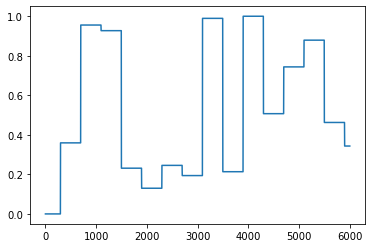

In [9]:
out = torch.Tensor(out).squeeze()
in1 = torch.Tensor(in1).squeeze()
in2 = torch.Tensor(in2).squeeze()
in1_lagged = lag_matrix(in1, 5)
out_lagged = lag_matrix(out, 14)
in2_lagged = lag_matrix(in2, 5)

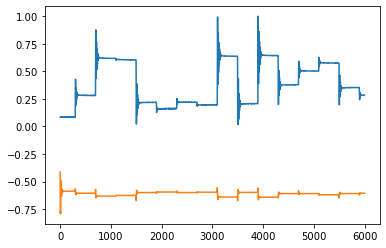

In [6]:
plt.plot(out.detach().numpy())
plt.plot(model2.predict([in1, in2]).detach().numpy())
plt.show()

In [7]:
# Closed Loop Training
optim = torch.optim.Adam(model2.parameters())
crit = nn.MSELoss()
for i in tqdm(range(100)):
    optim.zero_grad()
    pred = model2.predict([in1, in2])
    loss = crit(pred, out)
    loss.backward()
    optim.step()

  0%|          | 0/100 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Open Loop Training
optim = torch.optim.Adam(model2.parameters())
crit = nn.MSELoss()
dataset = torch.utils.data.TensorDataset(in1_lagged, in2_lagged, out_lagged, out)
loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)
print(model2)
for epoch in tqdm(range(200)):
    for i1, i2, ol, os in loader:
        optim.zero_grad()
        result = model2(ol, [i1, i2])
        # print(result)
        loss = crit(result, os)
        loss.backward()
        optim.step()

ANARX(
  (subnets): ModuleList(
    (0): LAGNET(
      (linear_layers): ModuleList(
        (0): Linear(in_features=3, out_features=1, bias=True)
      )
    )
    (1): LAGNET(
      (linear_layers): ModuleList(
        (0): Linear(in_features=3, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
    )
    (2): LAGNET(
      (linear_layers): ModuleList(
        (0): Linear(in_features=3, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
    )
    (3): LAGNET(
      (linear_layers): ModuleList(
        (0): Linear(in_features=3, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
    )
    (4): LAGNET(
      (linear_layers): ModuleList(
        (0): Linear(

100%|██████████| 200/200 [01:55<00:00,  1.74it/s]
